# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Tratamento dos dados:

### Carregando a base de dados

In [3]:
hotel_bookings = pd.read_csv('hotel_bookings.csv')
hotel_bookings.shape

(119390, 32)

### Tratando os valores `Nan`.

In [4]:
hotel_bookings['children'] = hotel_bookings['children'].replace(np.nan, 0)
hotel_bookings['country'] = hotel_bookings['country'].replace(np.nan, 'PRT')
hotel_bookings['agent'] = hotel_bookings['agent'].replace(np.nan, 0)

hotel_bookings.shape

(119390, 32)

In [5]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

### Separando as colunas que contém string nos dataframes e transformando em inteiros

In [6]:
hotel = hotel_bookings.iloc[:, 0].values
arrival_date_month = hotel_bookings.iloc[:, 4].values
meal = hotel_bookings.iloc[:, 12].values
country = hotel_bookings.iloc[:, 13].values
market_segment = hotel_bookings.iloc[:, 14].values
distribution_channel = hotel_bookings.iloc[:, 15].values
reserved_room_type = hotel_bookings.iloc[:, 19].values
assigned_room_type = hotel_bookings.iloc[:, 20].values
deposit_type = hotel_bookings.iloc[:, 22].values
customer_type = hotel_bookings.iloc[:, 26].values
reservation_status = hotel_bookings.iloc[:, 30].values

In [7]:
hotel = LabelEncoder().fit_transform(hotel)
arrival_date_month = LabelEncoder().fit_transform(arrival_date_month) 
meal = LabelEncoder().fit_transform(meal)
country = LabelEncoder().fit_transform(country)
market_segment = LabelEncoder().fit_transform(market_segment)
distribution_channel = LabelEncoder().fit_transform(distribution_channel)
reserved_room_type = LabelEncoder().fit_transform(reserved_room_type)
assigned_room_type = LabelEncoder().fit_transform(assigned_room_type)
deposit_type = LabelEncoder().fit_transform(deposit_type)
customer_type = LabelEncoder().fit_transform(customer_type)
reservation_status = LabelEncoder().fit_transform(reservation_status)

In [8]:
hotel = pd.DataFrame(hotel, columns = ['hotel'])
arrival_date_month = pd.DataFrame(arrival_date_month, columns = ['arrival_date_mounth'])
meal = pd.DataFrame(meal, columns = ['meal'])
country = pd.DataFrame(country, columns = ['country'])
market_segment = pd.DataFrame(market_segment, columns = ['market_segment'])
distribution_channel = pd.DataFrame(distribution_channel, columns = ['distribution_channel'])
reserved_room_type = pd.DataFrame(assigned_room_type, columns = ['reserved_room_type'])
assigned_room_type = pd.DataFrame(assigned_room_type, columns = ['assingned_room'])
deposit_type = pd.DataFrame(deposit_type, columns = ['deposit_type'])
customer_type = pd.DataFrame(customer_type, columns = ['custumer_type'])
reservation_status = pd.DataFrame(reservation_status, columns = ['reservation_status'])

In [9]:
hotel_bookings['distribution_channel'] = pd.to_numeric(hotel_bookings['distribution_channel'], errors='coerce').fillna(0)
hotel_bookings['reserved_room_type'] = pd.to_numeric(hotel_bookings['reserved_room_type'], errors='coerce').fillna(0)

In [10]:
hotel_bookings = hotel_bookings.drop(["hotel"], axis=1)
hotel_bookings = hotel_bookings.drop(["arrival_date_month"], axis=1)
hotel_bookings = hotel_bookings.drop(["meal"], axis=1)
hotel_bookings = hotel_bookings.drop(["country"], axis=1)
hotel_bookings = hotel_bookings.drop(["market_segment"], axis=1)
hotel_bookings = hotel_bookings.drop(["distribution_channel"], axis=1)
hotel_bookings = hotel_bookings.drop(["reserved_room_type"], axis=1)
hotel_bookings = hotel_bookings.drop(["assigned_room_type"], axis=1)
hotel_bookings = hotel_bookings.drop(["deposit_type"], axis=1)
hotel_bookings = hotel_bookings.drop(["customer_type"], axis=1)
hotel_bookings = hotel_bookings.drop(["reservation_status"], axis=1)
hotel_bookings = hotel_bookings.drop(["reservation_status_date"], axis=1)
hotel_bookings = hotel_bookings.drop(["company"], axis=1)
hotel_bookings = hotel_bookings.drop(["arrival_date_day_of_month"], axis=1)

hotel_bookings = pd.concat([hotel_bookings, hotel],axis=1)
hotel_bookings = pd.concat([hotel_bookings, arrival_date_month],axis=1)
hotel_bookings = pd.concat([hotel_bookings, meal],axis=1)
hotel_bookings = pd.concat([hotel_bookings, country],axis=1)
hotel_bookings = pd.concat([hotel_bookings, market_segment],axis=1)
hotel_bookings = pd.concat([hotel_bookings, distribution_channel],axis=1)
hotel_bookings = pd.concat([hotel_bookings, reserved_room_type],axis=1)
hotel_bookings = pd.concat([hotel_bookings, assigned_room_type],axis=1)
hotel_bookings = pd.concat([hotel_bookings, deposit_type],axis=1)
hotel_bookings = pd.concat([hotel_bookings, customer_type],axis=1)
hotel_bookings = pd.concat([hotel_bookings, reservation_status],axis=1)

In [11]:
hotel_bookings.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
hotel                               int32
arrival_date_mounth                 int32
meal                                int32
country                             int32
market_segment                      int32
distribution_channel              

In [12]:
filtro_resort = (hotel_bookings.hotel == 0)
filtro_city = (hotel_bookings.hotel == 1)

hotel_bookings_resort = hotel_bookings[filtro_resort]
hotel_bookings_city = hotel_bookings[filtro_city]

In [38]:
escala = StandardScaler()

df_resort_esc = escala.fit_transform(hotel_bookings_resort)
df_city_esc = escala.fit_transform(hotel_bookings_city)

for tupla in range(len(df_city_esc)):
    df_city_esc[tupla][18] = 1

# Apredizado:

In [14]:
wcss_resort = []
wcss_city = []

for i in range(1,24):
    kmeans_r = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans_r.fit(df_resort_esc)
#Método inertia para gerar o wcss
    wcss_resort.append(kmeans_r.inertia_)

for i in range(1,24):
    kmeans_c = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans_c.fit(df_city_esc)
#Método inertia para gerar o wcss
    wcss_city.append(kmeans_c.inertia_)

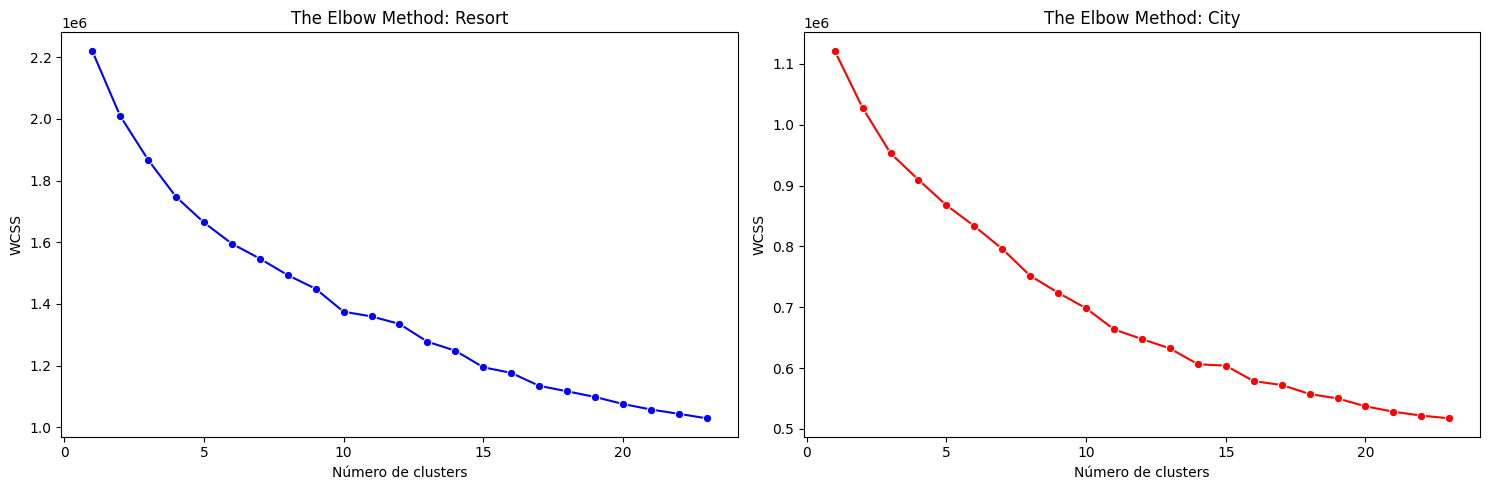

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# plot first line plot on first subplot
sns.lineplot(x=range(1, 24), y=wcss_resort, marker='o', color='b', ax=axs[0])
axs[0].set_title('The Elbow Method: Resort')
axs[0].set_xlabel('Número de clusters')
axs[0].set_ylabel('WCSS')

sns.lineplot(x=range(1, 24), y=wcss_city, marker='o', color='red', ax=axs[1])
axs[1].set_title('The Elbow Method: City')
axs[1].set_xlabel('Número de clusters')
axs[1].set_ylabel('WCSS')

plt.tight_layout()

plt.show()

In [16]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 5, max_iter = 300)

In [17]:
#Fazendo apenas com 4 clusters
kmeans_resort = kmeans.fit(df_resort_esc)
kmeans_city = kmeans.fit(df_city_esc)

In [18]:
# Inversão do escalonamento dos centroides
escala.inverse_transform(kmeans_resort.cluster_centers_)
escala.inverse_transform(kmeans_city.cluster_centers_)

array([[ 9.01016586e-01,  1.83673087e+02,  2.01588550e+03,
         2.60438737e+01,  1.06795078e+00,  2.83306581e+00,
         1.87586945e+00,  2.14018192e-03,  8.67361738e-17,
         2.14018192e-03,  1.76083467e+00,  2.14018192e-03,
         8.34670947e-02,  1.14768325e+02,  8.80149813e-01,
         6.56034778e+01,  1.01658641e-02,  7.49063670e-03,
         2.00000000e+00,  6.26591760e+00,  1.00588550e+00,
         1.18628678e+02,  4.08293205e+00,  2.22525415e+00,
         5.39325843e-01,  5.39325843e-01,  1.06313537e+00,
         2.12199037e+00,  1.13964687e-01],
       [ 4.24561404e-01,  9.29953216e+01,  2.01631579e+03,
         2.79664717e+01,  1.33762183e+00,  3.40116959e+00,
         2.13489279e+00,  1.62573099e+00,  2.49512671e-02,
         4.28849903e-03,  7.40740741e-03,  1.09161793e-02,
         3.84405458e-01,  2.24351657e+02,  3.89863548e-04,
         1.85276881e+02,  2.06627680e-01,  6.56920078e-01,
         2.00000000e+00,  4.31267057e+00,  5.31773879e-01,
         9.47

In [19]:
#Verificando a classificação dos dados
classificacao_resort = kmeans_resort.labels_
classificacao_city = kmeans_city.labels_

In [20]:
agrupamento_resort = pd.DataFrame(classificacao_resort, columns = ['Grupo'])
agrupamento_city = pd.DataFrame(classificacao_city, columns = ['Grupo'])

In [21]:
df_grupo_resort = pd.concat([hotel_bookings, agrupamento_resort],axis=1)
df_grupo_city = pd.concat([hotel_bookings, agrupamento_city],axis=1)

In [22]:
#Localizando pelo grupo
#print(df_grupo.loc[df_grupo.Grupo == 0])
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 0].mean()
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 0].mean()

### Clusters Hotel Resort:

In [23]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 0].mean()
print(mean_resort)

is_canceled                          0.901017
lead_time                          183.673087
arrival_date_year                 2015.885500
arrival_date_week_number            26.043874
stays_in_weekend_nights              1.067951
stays_in_week_nights                 2.833066
adults                               1.875869
children                             0.002140
babies                               0.000000
is_repeated_guest                    0.002140
previous_cancellations               1.760835
previous_bookings_not_canceled       0.002140
booking_changes                      0.083467
agent                              114.768325
days_in_waiting_list                 0.880150
adr                                 65.603478
required_car_parking_spaces          0.010166
total_of_special_requests            0.007491
hotel                                1.000000
arrival_date_mounth                  6.265918
meal                                 1.005886
country                           

In [24]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 1].mean()
print(mean_resort)

is_canceled                          0.424561
lead_time                           92.995322
arrival_date_year                 2016.315789
arrival_date_week_number            27.966472
stays_in_weekend_nights              1.337622
stays_in_week_nights                 3.401170
adults                               2.134893
children                             1.625731
babies                               0.024951
is_repeated_guest                    0.004288
previous_cancellations               0.007407
previous_bookings_not_canceled       0.010916
booking_changes                      0.384405
agent                              224.351657
days_in_waiting_list                 0.000390
adr                                185.276881
required_car_parking_spaces          0.206628
total_of_special_requests            0.656920
hotel                                1.000000
arrival_date_mounth                  4.312671
meal                                 0.531774
country                           

In [25]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 2].mean()
print(mean_resort)

is_canceled                          0.051240
lead_time                           19.838017
arrival_date_year                 2016.382920
arrival_date_week_number            21.776309
stays_in_weekend_nights              0.482645
stays_in_week_nights                 1.500275
adults                               1.432507
children                             0.025344
babies                               0.002204
is_repeated_guest                    0.949862
previous_cancellations               0.141047
previous_bookings_not_canceled       2.628099
booking_changes                      0.284848
agent                               73.662810
days_in_waiting_list                 0.154821
adr                                 63.074386
required_car_parking_spaces          0.233609
total_of_special_requests            0.620386
hotel                                1.000000
arrival_date_mounth                  4.895868
meal                                 0.214325
country                           

In [26]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 3].mean()
print(mean_resort)

is_canceled                          0.080094
lead_time                           55.503787
arrival_date_year                 2016.042344
arrival_date_week_number            27.348814
stays_in_weekend_nights              0.729542
stays_in_week_nights                 2.243015
adults                               1.710915
children                             0.035763
babies                               0.016764
is_repeated_guest                    0.000000
previous_cancellations               0.008941
previous_bookings_not_canceled       0.099218
booking_changes                      0.511983
agent                               72.611325
days_in_waiting_list                 0.947970
adr                                 83.870360
required_car_parking_spaces          0.219173
total_of_special_requests            0.356265
hotel                                1.000000
arrival_date_mounth                  5.726686
meal                                 0.386564
country                           

In [27]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 4].mean()
print(mean_resort)

is_canceled                          1.000000
lead_time                          125.239626
arrival_date_year                 2016.212421
arrival_date_week_number            27.896675
stays_in_weekend_nights              1.350646
stays_in_week_nights                 3.495878
adults                               1.936246
children                             0.028442
babies                               0.011954
is_repeated_guest                    0.002611
previous_cancellations               0.056746
previous_bookings_not_canceled       0.001099
booking_changes                      0.164193
agent                              222.925941
days_in_waiting_list                 0.121737
adr                                107.502236
required_car_parking_spaces          0.000000
total_of_special_requests            0.632179
hotel                                1.000000
arrival_date_mounth                  4.997802
meal                                 0.555510
country                           

In [28]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 5].mean()
print(mean_resort)

is_canceled                          0.008953
lead_time                           73.775560
arrival_date_year                 2016.085703
arrival_date_week_number            26.930495
stays_in_weekend_nights              0.988313
stays_in_week_nights                 2.576134
adults                               1.873565
children                             0.023100
babies                               0.015787
is_repeated_guest                    0.000000
previous_cancellations               0.000478
previous_bookings_not_canceled       0.014352
booking_changes                      0.241457
agent                              221.828458
days_in_waiting_list                 0.710156
adr                                 88.728824
required_car_parking_spaces          0.181042
total_of_special_requests            0.838163
hotel                                1.000000
arrival_date_mounth                  5.162794
meal                                 0.543945
country                           

In [29]:
mean_resort = df_grupo_resort.loc[df_grupo_resort.Grupo == 6].mean()
print(mean_resort)

is_canceled                          0.052495
lead_time                          170.689709
arrival_date_year                 2016.112526
arrival_date_week_number            28.588877
stays_in_weekend_nights              2.909304
stays_in_week_nights                 7.119283
adults                               2.061331
children                             0.026507
babies                               0.009356
is_repeated_guest                    0.005198
previous_cancellations               0.004418
previous_bookings_not_canceled       0.012474
booking_changes                      0.266632
agent                              143.770010
days_in_waiting_list                 0.079002
adr                                 87.161333
required_car_parking_spaces          0.037422
total_of_special_requests            0.589657
hotel                                1.000000
arrival_date_mounth                  6.031445
meal                                 0.787942
country                           

### Clusters Hotel city:

In [30]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 0].mean()
print(mean_city)

is_canceled                          0.901017
lead_time                          183.673087
arrival_date_year                 2015.885500
arrival_date_week_number            26.043874
stays_in_weekend_nights              1.067951
stays_in_week_nights                 2.833066
adults                               1.875869
children                             0.002140
babies                               0.000000
is_repeated_guest                    0.002140
previous_cancellations               1.760835
previous_bookings_not_canceled       0.002140
booking_changes                      0.083467
agent                              114.768325
days_in_waiting_list                 0.880150
adr                                 65.603478
required_car_parking_spaces          0.010166
total_of_special_requests            0.007491
hotel                                1.000000
arrival_date_mounth                  6.265918
meal                                 1.005886
country                           

In [31]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 1].mean()
print(mean_city)

is_canceled                          0.424561
lead_time                           92.995322
arrival_date_year                 2016.315789
arrival_date_week_number            27.966472
stays_in_weekend_nights              1.337622
stays_in_week_nights                 3.401170
adults                               2.134893
children                             1.625731
babies                               0.024951
is_repeated_guest                    0.004288
previous_cancellations               0.007407
previous_bookings_not_canceled       0.010916
booking_changes                      0.384405
agent                              224.351657
days_in_waiting_list                 0.000390
adr                                185.276881
required_car_parking_spaces          0.206628
total_of_special_requests            0.656920
hotel                                1.000000
arrival_date_mounth                  4.312671
meal                                 0.531774
country                           

In [32]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 2].mean()
print(mean_city)

is_canceled                          0.051240
lead_time                           19.838017
arrival_date_year                 2016.382920
arrival_date_week_number            21.776309
stays_in_weekend_nights              0.482645
stays_in_week_nights                 1.500275
adults                               1.432507
children                             0.025344
babies                               0.002204
is_repeated_guest                    0.949862
previous_cancellations               0.141047
previous_bookings_not_canceled       2.628099
booking_changes                      0.284848
agent                               73.662810
days_in_waiting_list                 0.154821
adr                                 63.074386
required_car_parking_spaces          0.233609
total_of_special_requests            0.620386
hotel                                1.000000
arrival_date_mounth                  4.895868
meal                                 0.214325
country                           

In [33]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 3].mean()
print(mean_city)

is_canceled                          0.080094
lead_time                           55.503787
arrival_date_year                 2016.042344
arrival_date_week_number            27.348814
stays_in_weekend_nights              0.729542
stays_in_week_nights                 2.243015
adults                               1.710915
children                             0.035763
babies                               0.016764
is_repeated_guest                    0.000000
previous_cancellations               0.008941
previous_bookings_not_canceled       0.099218
booking_changes                      0.511983
agent                               72.611325
days_in_waiting_list                 0.947970
adr                                 83.870360
required_car_parking_spaces          0.219173
total_of_special_requests            0.356265
hotel                                1.000000
arrival_date_mounth                  5.726686
meal                                 0.386564
country                           

In [34]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 4].mean()
print(mean_city)

is_canceled                          1.000000
lead_time                          125.239626
arrival_date_year                 2016.212421
arrival_date_week_number            27.896675
stays_in_weekend_nights              1.350646
stays_in_week_nights                 3.495878
adults                               1.936246
children                             0.028442
babies                               0.011954
is_repeated_guest                    0.002611
previous_cancellations               0.056746
previous_bookings_not_canceled       0.001099
booking_changes                      0.164193
agent                              222.925941
days_in_waiting_list                 0.121737
adr                                107.502236
required_car_parking_spaces          0.000000
total_of_special_requests            0.632179
hotel                                1.000000
arrival_date_mounth                  4.997802
meal                                 0.555510
country                           

In [35]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 5].mean()
print(mean_city)

is_canceled                          0.008953
lead_time                           73.775560
arrival_date_year                 2016.085703
arrival_date_week_number            26.930495
stays_in_weekend_nights              0.988313
stays_in_week_nights                 2.576134
adults                               1.873565
children                             0.023100
babies                               0.015787
is_repeated_guest                    0.000000
previous_cancellations               0.000478
previous_bookings_not_canceled       0.014352
booking_changes                      0.241457
agent                              221.828458
days_in_waiting_list                 0.710156
adr                                 88.728824
required_car_parking_spaces          0.181042
total_of_special_requests            0.838163
hotel                                1.000000
arrival_date_mounth                  5.162794
meal                                 0.543945
country                           

In [36]:
mean_city = df_grupo_city.loc[df_grupo_city.Grupo == 6].mean()
print(mean_city)

is_canceled                          0.052495
lead_time                          170.689709
arrival_date_year                 2016.112526
arrival_date_week_number            28.588877
stays_in_weekend_nights              2.909304
stays_in_week_nights                 7.119283
adults                               2.061331
children                             0.026507
babies                               0.009356
is_repeated_guest                    0.005198
previous_cancellations               0.004418
previous_bookings_not_canceled       0.012474
booking_changes                      0.266632
agent                              143.770010
days_in_waiting_list                 0.079002
adr                                 87.161333
required_car_parking_spaces          0.037422
total_of_special_requests            0.589657
hotel                                1.000000
arrival_date_mounth                  6.031445
meal                                 0.787942
country                           